# Introduction to Keras — Lab Objectives

### Goals of the lab work:
- Understand the interface of layers used in building neural networks  
- Learn how to train neural networks effectively  
- Explore the impact of network depth, normalization, and regularization on performance  
- Compare different optimizers to evaluate accuracy and convergence speed  

---

### Structure of the lab (Tasks 1–7):
1. **Single-layer network (baseline):** Establish a starting point with ~92–93% accuracy.  
2. **Two-layer network:** Demonstrate how adding hidden layers improves accuracy (~97.6%).  
3. **Three-layer network:** Further increase accuracy (~97.9%), showing diminishing returns.  
4. **Normalization layers (BatchNorm, Dropout, L2):** Improve convergence speed and stability, with accuracy ~98.1%.  
5. **Deep fully connected network:** Achieve ~98.3% accuracy using multiple dense layers, dropout, and batch normalization.  
6. **Network with one convolutional layer:** Introduce convolution for image data, reaching ~98.34% accuracy and faster convergence.  
7. **Optimizer comparison:** Evaluate SGD, Momentum, NAG, AdaGrad, Adadelta, RMSprop, and Adam.  
   - **Best accuracy:** Adadelta (~98.3%)  
   - **Fastest convergence:** Adadelta  

---
### Interpretive Note:
This lab progresses from simple architectures to deeper and more complex models, illustrating how each design choice (layers, normalization, regularization, optimizers) affects accuracy, loss, and training dynamics. By the end, you will have a clear understanding of how to build and optimize neural networks in Keras for image classification tasks.

## Imports & Setup

In [ ]:
# Keras Lab Work
# Author: Semyon Kim

# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# Keras modules
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.datasets import mnist

# --- Reproducibility ---
np.random.seed(123)

# --- Version Check ---
print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

2.2.5
1.15.0


## Data Preparation

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


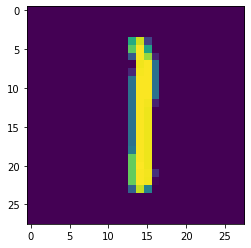

1.0 0.0 float32
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


In [ ]:
# --- Load MNIST dataset ---
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# --- Reshape data ---
# Keras expects input shape (channels, height, width) for Conv2D
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# --- Normalize pixel values ---
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# --- One-hot encode labels ---
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# --- Visualize a sample ---
index = 1238
plt.imshow(X_train[index, 0, :, :], cmap="gray")
plt.title(f"Sample digit (label: {np.argmax(Y_train[index])})")
plt.show()

# --- Inspect sample values ---
print("Pixel max:", np.max(X_train[index,0,:,:]))
print("Pixel min:", np.min(X_train[index,0,:,:]))
print("Pixel dtype:", X_train.dtype)
print("One-hot label:", Y_train[index])
print("Numeric label:", np.argmax(Y_train[index]))

## Task 1 (1 point) — Single-Layer Neural Network

**Content:**  
Train the simplest single-layer neural network on the MNIST dataset.  

- **Goal:** Achieve the highest possible accuracy on the test set.  
- **Notes:**  
  - You may adjust training parameters (batch size, number of epochs, optimizer).  
  - L2 regularization was tested: a small coefficient had negligible effect, while larger values significantly reduced accuracy.  

---

Example result (with tuned parameters):
  ```
  loss: 0.2865
  acc: 0.9269
  
  val_loss: 0.2997
  val_acc: 0.9232
  ```

---

### Interpretive Note:  
This baseline model achieved ~92–93% accuracy. It highlights the limitations of shallow networks and sets the stage for deeper architectures.

In [ ]:
from keras.regularizers import l2
from keras.optimizers import Adam

# --- Regularization coefficient ---
l2_lambda = 0.0001

# --- Input layer ---
input_image = Input(shape=(1, 28, 28))

# --- Flatten image into vector ---
flatten = Flatten()(input_image)

# --- Single dense layer with softmax activation ---
# Updated: use 'kernel_regularizer' instead of deprecated 'W_regularizer'
dense_output = Dense(10,
                     activation='softmax',
                     kernel_regularizer=l2(l2_lambda))(flatten)

# --- Build model ---
model = Model(inputs=input_image, outputs=dense_output)

# --- Compile model ---
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# --- Train model ---
history = model.fit(X_train, Y_train,
                    validation_split=0.25,
                    batch_size=200,
                    epochs=20,   # updated argument name
                    verbose=1)

# --- Evaluate model ---
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Task 2 (2 points) — Two-Layer Fully Connected Network

**Content:**  
In this task, we train a simple two‑layer fully connected neural network on the MNIST dataset.  
- **Goal**: Improve accuracy compared to the single‑layer baseline (Task 1).  
- **Note**:
  - You are allowed to change training parameters (batch size, epochs, optimizer) to maximize test accuracy.  
  
---

### Your test accuracy:
 `print(score[0], score[1])`

Example result:  
  ```
  loss: 0.0855
  accuracy: 0.9759
  ```

---

### Interpretive Note:  
Accuracy improved significantly (~97.6%) compared to Task 1, demonstrating the power of adding hidden layers.

In [ ]:
# --- Two-layer fully connected network ---
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

# Input layer
input_image = Input(shape=(1, 28, 28))

# Flatten image into vector
flatten = Flatten()(input_image)

# First dense layer with ReLU activation
dense1 = Dense(128, activation='relu')(flatten)

# Output layer with softmax activation (10 classes)
dense2 = Dense(10, activation='softmax')(dense1)

# Build model
model = Model(inputs=input_image, outputs=dense2)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, Y_train,
                    validation_split=0.25,
                    batch_size=200,
                    epochs=20,       # updated argument name
                    verbose=1)

# Evaluate model
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Task 3 (2 points) — Three-Layer Fully Connected Network

**Content:**  
In this task, we train a three‑layer fully connected neural network on the MNIST dataset.  
- **Goal**: Improve accuracy compared to the two‑layer model (Task 2).  
- **Note**:
  - You are allowed to change training parameters (batch size, epochs, optimizer) to maximize test accuracy.

---

### Your test accuracy:
 `print(score[0], score[1])`

Example result:  
  ```
  loss: 0.0747  
  accuracy: 0.9788
  ```

---

### Interpretive Note:  
Adding a third hidden layer increased accuracy to ~97.9%, showing diminishing returns compared to the two‑layer model but still a measurable improvement.


In [ ]:
# --- Three-layer fully connected network ---
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

# Input layer
input_image = Input(shape=(1, 28, 28))

# Flatten image into vector
flatten = Flatten()(input_image)

# First dense layer with ReLU activation
dense1 = Dense(960, activation='relu')(flatten)

# Second dense layer with ReLU activation
dense2 = Dense(160, activation='relu')(dense1)

# Output layer with softmax activation (10 classes)
dense3 = Dense(10, activation='softmax')(dense2)

# Build model
model = Model(inputs=input_image, outputs=dense3)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, Y_train,
                    validation_split=0.25,
                    batch_size=100,
                    epochs=10,       # updated argument name
                    verbose=1)

# Evaluate model
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Task 4 (3 points) — Adding Normalization Layers

**Content:**  
In this task, we test whether the accuracy improves when adding normalization layers (such as Dropout, Batch Normalization, etc.) to the network.  
- **Goal**: Compare results with previous tasks and observe the effect of these techniques on accuracy, loss, and convergence speed.

---

### Your test accuracy
`print(score[0], score[1])`

Example result:
  ```
  loss: 0.1652  
  accuracy: 0.9816  
  ```

---

### Interpretive Note:  
Accuracy improved with normalization, but loss increased. Convergence speed was faster, showing that normalization stabilizes training but may shift the balance between accuracy and loss.


In [ ]:
# --- Fully connected network with normalization layers ---
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam

# Regularization coefficient
l2_lambda = 0.0001

# Input layer
input_image = Input(shape=(1, 28, 28))

# Flatten image into vector
flatten = Flatten()(input_image)
flatten = BatchNormalization(axis=1)(flatten)

# First dense layer with ReLU activation + L2 regularization
dense1 = Dense(1024, activation='relu',
               kernel_regularizer=l2(l2_lambda))(flatten)
dense1 = BatchNormalization(axis=1)(dense1)
drop1 = Dropout(0.5)(dense1)

# Second dense layer with ReLU activation + L2 regularization
dense2 = Dense(128, activation='relu',
               kernel_regularizer=l2(l2_lambda))(drop1)
dense2 = BatchNormalization(axis=1)(dense2)
drop2 = Dropout(0.5)(dense2)

# Output layer with softmax activation
dense3 = Dense(10, activation='softmax')(drop2)

# Build model
model = Model(inputs=input_image, outputs=dense3)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, Y_train,
                    validation_split=0.25,
                    batch_size=250,
                    epochs=50,       # updated argument name
                    verbose=1)

# Evaluate model
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Task 5 (4 points) — Deep Fully Connected Network (No Convolutional Layers)

**Content:**  
In this task, we train a deep fully connected neural network (without convolutional layers) to achieve the best possible accuracy on the MNIST test set.  
- **Goal**: Maximize test performance using deeper architectures, normalization, and dropout.
- **Note**:
  - There are no restrictions on the number of layers

---

### Your test accuracy
`print(score[0], score[1])`

Example result:
  ```
  loss: 0.0677  
  accuracy: 0.9828
  ```

---

### Interpretive Note:  
Increasing depth and adding normalization/dropout improved accuracy to ~98.3%. However, deeper networks also increased training time and risk of overfitting.

In [ ]:
# --- Deep fully connected network (no convolutional layers) ---
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# Input layer
input_image = Input(shape=(1, 28, 28))

# Flatten image into vector + normalization
flatten = Flatten()(input_image)
flatten = BatchNormalization(axis=1)(flatten)

# First dense block
dense1 = Dense(1024, activation='relu')(flatten)
dense1 = BatchNormalization(axis=1)(dense1)
drop1 = Dropout(0.5)(dense1)

# Second dense block
dense12 = Dense(760, activation='relu')(drop1)
dense12 = BatchNormalization(axis=1)(dense12)
drop12 = Dropout(0.5)(dense12)

# Third dense block
dense22 = Dense(560, activation='relu')(drop12)
dense22 = BatchNormalization(axis=1)(dense22)
drop22 = Dropout(0.5)(dense22)

# Fourth dense block
dense2 = Dense(160, activation='relu')(drop22)
dense2 = BatchNormalization(axis=1)(dense2)
drop2 = Dropout(0.5)(dense2)

# Output layer
dense3 = Dense(10, activation='softmax')(drop2)

# Build model
model = Model(inputs=input_image, outputs=dense3)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, Y_train,
                    validation_split=0.25,
                    batch_size=100,
                    epochs=25,       # updated argument name
                    verbose=1)

# Evaluate model
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Task 6 (3 points) — Network with One Convolutional Layer

**Content:**  
In this task, we train a neural network with a single convolutional layer to achieve the best possible accuracy on the MNIST test set.  
- **Goal**: Compare performance with previous fully connected models and observe the effect of adding convolution.
- **Note**:
  - There are no restrictions on the total number of fully connected layers, and subsampling (pooling) layers can be used without limitation.   

---

### Your test accuracy
`print(score[0], score[1])`

Example result:
  ```
  loss: 0.0599  
  accuracy: 0.9834
  ```

---

### Interpretive Note:
Adding a convolutional layer improved accuracy slightly compared to deep fully connected networks. The model also converged faster, showing the benefit of convolution for image data.


In [ ]:
# --- Neural network with one convolutional layer ---
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam

# Input layer
input_image = Input(shape=(1, 28, 28))

# Initial pooling layer
pool1 = MaxPooling2D(pool_size=(2, 2), data_format='channels_first')(input_image)

# Convolutional block
inp_norm = BatchNormalization(axis=1)(pool1)
conv = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
              padding='same', data_format='channels_first')(inp_norm)
conv = BatchNormalization(axis=1)(conv)
conv = Dropout(0.5)(conv)

# Additional pooling
pool = MaxPooling2D(pool_size=(2, 2), data_format='channels_first')(conv)

# Flatten for dense layers
flatten = Flatten()(pool)
flatten = BatchNormalization(axis=1)(flatten)

# Dense blocks
dense1 = Dense(1024, activation='relu')(flatten)
dense1 = BatchNormalization(axis=1)(dense1)
drop1 = Dropout(0.5)(dense1)

dense12 = Dense(760, activation='relu')(drop1)
dense12 = BatchNormalization(axis=1)(dense12)
drop12 = Dropout(0.5)(dense12)

dense22 = Dense(560, activation='relu')(drop12)
dense22 = BatchNormalization(axis=1)(dense22)
drop22 = Dropout(0.5)(dense22)

dense2 = Dense(160, activation='relu')(drop22)
dense2 = BatchNormalization(axis=1)(dense2)
drop2 = Dropout(0.5)(dense2)

# Output layer
dense3 = Dense(10, activation='softmax')(drop2)

# Build model
model = Model(inputs=input_image, outputs=dense3)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, Y_train,
                    validation_split=0.25,
                    batch_size=300,
                    epochs=25,       # updated argument name
                    verbose=1)

# Evaluate model
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Task 7 (5 points) — Comparing Optimizers

**Content:**  
In this task, we train the best neural network architecture from previous experiments using different optimizers:  
SGD, SGD + Momentum, SGD + NAG, AdaGrad, Adadelta, RMSprop, and Adam.  

The goal is to determine:  
- Which optimizer achieves the highest accuracy on the test set.  
- Which optimizer converges the fastest during training.  

---

### Test accuracy with different optimizers
```
SGD                loss: 0.1443   accuracy: 0.9520  
SGD + Momentum     loss: 0.0648   accuracy: 0.9800  
SGD + NAG          loss: 0.0627   accuracy: 0.9800  
AdaGrad            loss: 0.0562   accuracy: 0.9833  
Adadelta           loss: 0.0553   accuracy: 0.9833  
RMSprop            loss: 0.0760   accuracy: 0.9812  
Adam               loss: 0.0636   accuracy: 0.9818  
```
**Best accuracy:** Adadelta (~98.3%)  
**Fastest convergence:** Adadelta


In [ ]:
# --- Best neural network architecture with optimizer comparison ---
# Input layer
input_image = Input(shape=(1, 28, 28))

# Initial pooling
pool1 = MaxPooling2D(pool_size=(2, 2), data_format='channels_first')(input_image)

# Convolutional block
inp_norm = BatchNormalization(axis=1)(pool1)
conv = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
              padding='same', data_format='channels_first')(inp_norm)
conv = BatchNormalization(axis=1)(conv)
conv = Dropout(0.5)(conv)

# Additional pooling
pool = MaxPooling2D(pool_size=(2, 2), data_format='channels_first')(conv)

# Flatten for dense layers
flatten = Flatten()(pool)
flatten = BatchNormalization(axis=1)(flatten)

# Dense blocks
dense1 = Dense(1024, activation='relu')(flatten)
dense1 = BatchNormalization(axis=1)(dense1)
drop1 = Dropout(0.5)(dense1)

dense12 = Dense(760, activation='relu')(drop1)
dense12 = BatchNormalization(axis=1)(dense12)
drop12 = Dropout(0.5)(dense12)

dense22 = Dense(560, activation='relu')(drop12)
dense22 = BatchNormalization(axis=1)(dense22)
drop22 = Dropout(0.5)(dense22)

dense2 = Dense(160, activation='relu')(drop22)
dense2 = BatchNormalization(axis=1)(dense2)
drop2 = Dropout(0.5)(dense2)

# Output layer
dense3 = Dense(10, activation='softmax')(drop2)

# Build model
model = Model(inputs=input_image, outputs=dense3)

# Compile model with Adam optimizer (example)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, Y_train,
                    validation_split=0.25,
                    batch_size=300,
                    epochs=25,       # updated argument name
                    verbose=1)

# Evaluate model
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])